In [2]:
import pandas as pd 

Загружаем датасет и смотрим первые 10 строчек, чтобы посмотреть какие столбцы тут находятся и какую информацию они несут, как представлены тут значения.

# Pandas

In [3]:
df = pd.read_csv('temporal.csv')
df.head(10)

,Mes,data science,machine learning,deep learning,categorical
0,2004-01-01,12,18,4,1
1,2004-02-01,12,21,2,1
2,2004-03-01,9,21,2,1
3,2004-04-01,10,16,4,1
4,2004-05-01,7,14,3,1
5,2004-06-01,9,17,3,1
6,2004-07-01,9,16,3,1
7,2004-08-01,7,14,3,1
8,2004-09-01,10,17,4,1
9,2004-10-01,8,17,4,1


С помощью команды `describe`  можно увидеть как данные распределены, увидеть max, min, mean и т.д.

In [4]:
df.describe()

,data science,machine learning,deep learning,categorical
count,194.000000,194.000000,194.000000,194.000000
mean,20.953608,27.396907,24.231959,0.257732
std,23.951006,28.091490,34.476887,0.438517
min,4.000000,7.000000,1.000000,0.000000
25%,6.000000,9.000000,2.000000,0.000000
50%,8.000000,13.000000,3.000000,0.000000
75%,26.750000,31.500000,34.000000,1.000000
max,100.000000,100.000000,100.000000,1.000000


Команда `info`  показывает какого типа данные включает каждая колонка. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mes               194 non-null    object
 1   data science      194 non-null    int64 
 2   machine learning  194 non-null    int64 
 3   deep learning     194 non-null    int64 
 4   categorical       194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


С помощью следующих команд мы убираем ограничения по колличеству отображаемых данных.(Осторожно при использовании с большими данными)

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Используя `Pandas` мы можем получить больше информации, чем от просмотра таблицы.Определим словарь, в который занесём паттерн отображения данных в таблице.

In [8]:
format_dict = {
    'data science' : '${0:,.2f}',
    'Mes' : '{:%m-%Y}',
    'machine learning' : '{:.2%}'}

df['Mes'] = pd.to_datetime(df['Mes'])

# применяем формат для визуализации 
df.head().style.format(format_dict)

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,$12.00,1800.00%,4,1
1,02-2004,$12.00,2100.00%,2,1
2,03-2004,$9.00,2100.00%,2,1
3,04-2004,$10.00,1600.00%,4,1
4,05-2004,$7.00,1400.00%,3,1


Закрасим `max` и `min`

In [10]:
format_dict = {'Mes' : '{:%m-%Y}'}
df.head().style.format(format_dict).highlight_max(color='darkgreen').highlight_min(color='#ff0000')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


Используем цветовой градиент для отображения значений в данных 

In [13]:
# приминительно для колонок data science и machine lerning
df.head(10).style.format(format_dict).background_gradient(subset=['data science','machine learning'], cmap='BuGn')

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


Отобразим данные в виде шкалы заполнения

In [14]:
df.head().style.format(format_dict).bar(color='pink', subset=['data science', 'deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1


Совместим последние два приёма

In [16]:
df.head(10).style.format(format_dict).background_gradient(subset=['data science', 'machine learning'], cmap='BuGn').bar(color='pink', subset=['deep learning'])

,Mes,data science,machine learning,deep learning,categorical
0,01-2004,12,18,4,1
1,02-2004,12,21,2,1
2,03-2004,9,21,2,1
3,04-2004,10,16,4,1
4,05-2004,7,14,3,1
5,06-2004,9,17,3,1
6,07-2004,9,16,3,1
7,08-2004,7,14,3,1
8,09-2004,10,17,4,1
9,10-2004,8,17,4,1


# Pandas Profiling

`Pandas Profiling` это библиотека, которая генерирует интерактивные очёты по нашим данным.

In [17]:
from pandas_profiling import ProfileReport

In [18]:
prof = ProfileReport(df)

In [19]:
prof

In [20]:
prof.to_file(output_file='report.html')

# Matplotlib

`Matplotlib` самая простая библиотека для визуализации.

Диаграммы `Matplotlib` состоят из двух основных компонентов: `axis` (линий, ограничивающих область диаграммы) и фигуры (где мы рисуем оси, заголовки и объекты, выходящие за пределы области осей).

In [21]:
import matplotlib.pyplot as plt

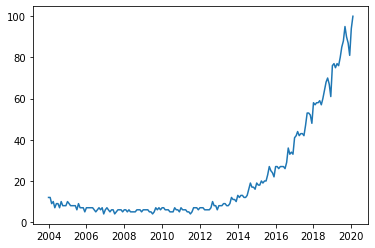

In [23]:
plt.plot(df['Mes'], df['data science'],
         label='data science');

Мы можем построить графики нескольких переменных в одной картинке и сравнить их.

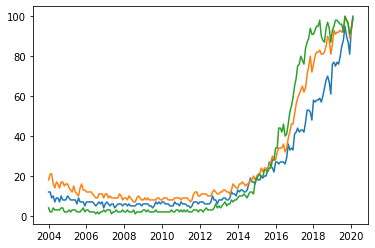

In [28]:
plt.plot(df['Mes'], df['data science'], label='data science');
plt.plot(df['Mes'], df['machine learning'], label='machine learning');
plt.plot(df['Mes'], df['deep learning'], label='deep learning');

Добавим легенду для графика, чтобы картин стала яснее 

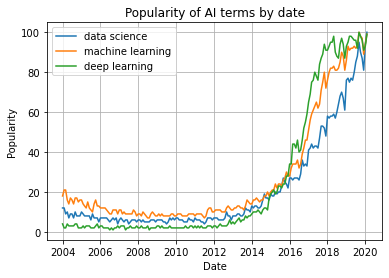

In [27]:
plt.plot(df['Mes'], df['data science'], label='data science');
plt.plot(df['Mes'], df['machine learning'], label='machine learning');
plt.plot(df['Mes'], df['deep learning'], label='deep learning');
plt.xlabel('Date');
plt.ylabel('Popularity');
plt.title('Popularity of AI terms by date');
plt.grid(True);
plt.legend();

In [30]:
%matplotlib inline

Построим несколько графиков на одном графике

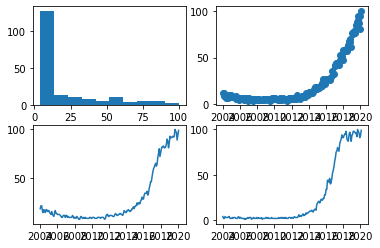

In [33]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(df['data science']);
axes[0,1].scatter(df['Mes'],df['data science']);
axes[1,0].plot(df['Mes'],df['machine learning']);
axes[1,1].plot(df['Mes'],df['deep learning']);

Мы можем нарисовать график с разными стилями для точек каждой переменной

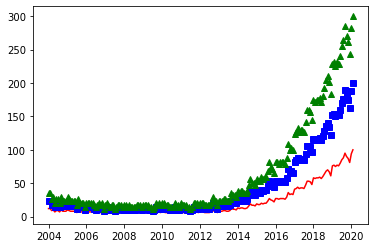

In [35]:
plt.plot(df['Mes'],df['data science'],'r-');
plt.plot(df['Mes'],df['data science']*2,'bs');
plt.plot(df['Mes'],df['data science']*3,'g^');

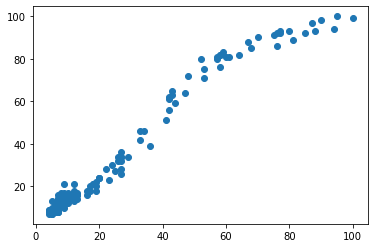

In [37]:
plt.scatter(df['data science'], df['machine learning']);

Пример гистограммы

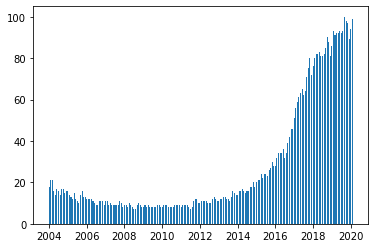

In [39]:
plt.bar(df['Mes'],df['machine learning'],width=20);

Пример гистограммы

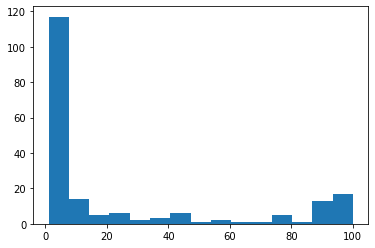

In [41]:
plt.hist(df['deep learning'], bins=15);

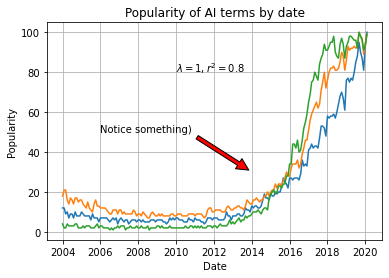

In [43]:
plt.plot(df['Mes'], df['data science'], label='data science');
plt.plot(df['Mes'], df['machine learning'], label='machine learning');
plt.plot(df['Mes'], df['deep learning'], label='deep learning');
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.title('Popularity of AI terms by date')
plt.grid(True)
plt.text(x='2010-01-01', y=80, s=r'$\lambda=1, r^2=0.8$')
plt.annotate('Notice something)', xy=('2014-01-01',30), xytext=('2006-01-01', 50), arrowprops={'facecolor':'red', 'shrink':0.05});

# Seaborn

`Seaborn` это библиотека основанная на `Matplotlib`. По сути, для нас это значит, что мы можем рисовать более красивые графики , путём написания меньшого колличества строк кода.

In [44]:
import seaborn as sns

/home/aleksandr/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


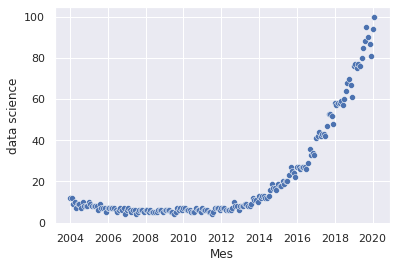

In [47]:
sns.set();
sns.scatterplot(df['Mes'], df['data science']);

Мы можем добавить информацию о более чем двух переменных в один график. 

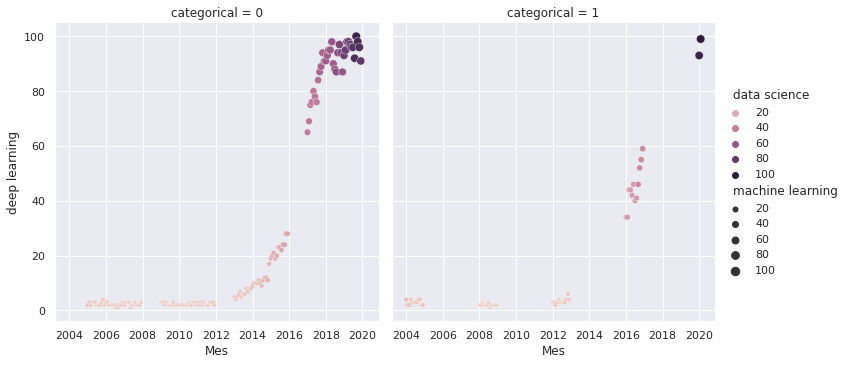

In [50]:
sns.relplot(x='Mes',
            y='deep learning',
            hue='data science',
            size='machine learning',
            col='categorical',
            data=df);

Посмотрим на корреляцию между переменными

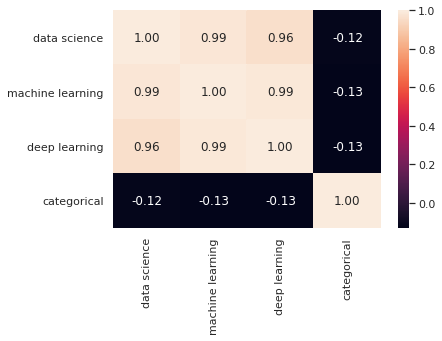

In [52]:
sns.heatmap(df.corr(),
            annot=True,
            fmt='.2f');

Другой один из популярных графиков - это парный график, который показывает нам отношения между всеми переменными. Нужно быть  осторожным с этой функцией, если у вас большой набор данных, поскольку она должна отображать все точки данных столько раз, сколько столбцов, это означает, что при увеличении размерности данных время обработки увеличивается экспоненциально.

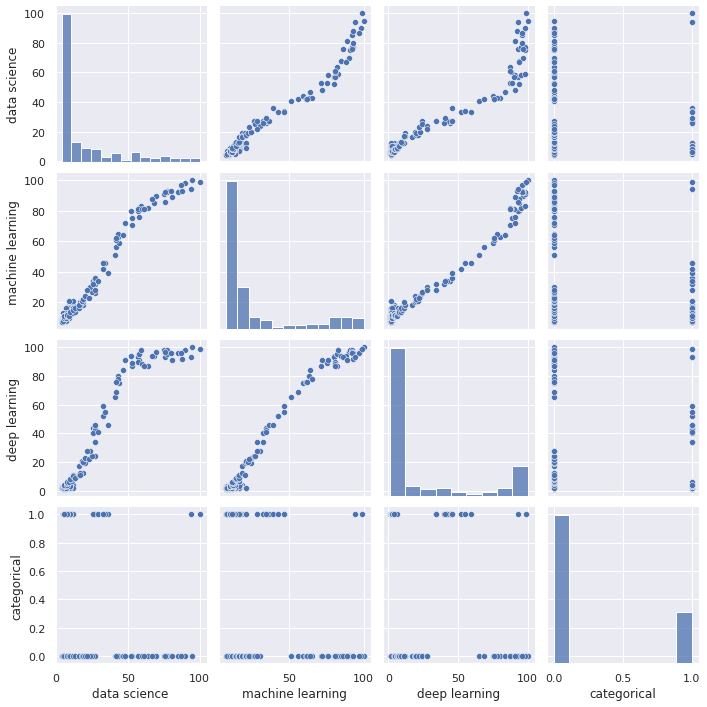

In [54]:
sns.pairplot(df);

Построим парный график, показывающий диаграммы, сегментированные в соответствии со значениями категориальной переменной.

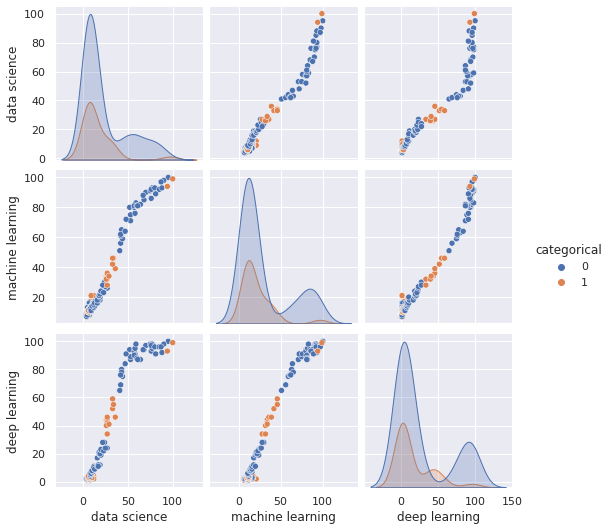

In [56]:
sns.pairplot(df,hue='categorical');

Очень информативный график - это совместный график, который позволяет нам увидеть диаграмму рассеяния вместе с гистограммой двух переменных и увидеть, как они распределены

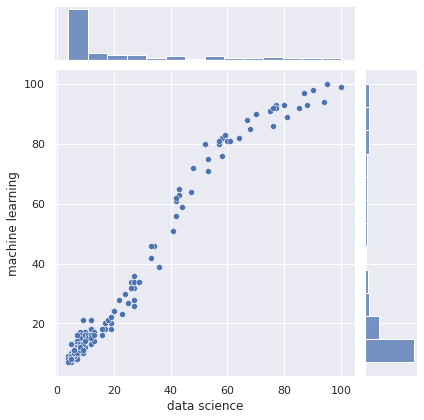

In [57]:
sns.jointplot(x='data science', y='machine learning', data=df);

Мы можем создавать несколько графиков в одном графике, как мы это делали с `Matplotlib`.

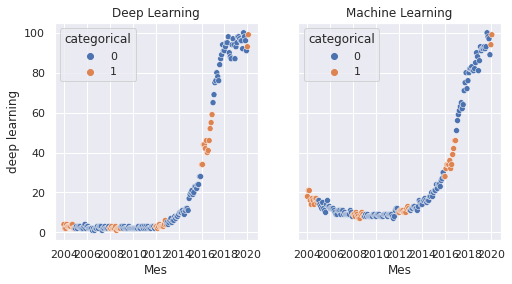

In [59]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
sns.scatterplot(x="Mes", y="deep learning", hue="categorical", data=df, ax=axes[0])
axes[0].set_title('Deep Learning');
sns.scatterplot(x="Mes", y="machine learning", hue="categorical", data=df, ax=axes[1])
axes[1].set_title('Machine Learning');

# Bokeh

`Bokeh` - это библиотека, которая позволяет создавать интерактивную графику. Мы можем экспортировать их в HTML-документ, которым мы можем поделиться со всеми, у кого есть веб-браузер.

Это очень полезная библиотека, когда мы заинтересованы в поиске объектов в графике и хотим иметь возможность увеличивать масштаб и перемещать графику. Или когда мы хотим поделиться ими и дать возможность изучить данные другому человеку.

In [74]:
from bokeh.plotting import figure, output_file, save, gridplot

In [62]:
output_file('data_science_popularity.html')

In [70]:
p=figure(title='data science', 
         x_axis_label='data science')
p.line(df['Mes'],
       df['data science'],
       legend='popularity',
       line_width=2)
save(p)

'/home/aleksandr/DS_lessons/Для души/Vizualization/data_science_popularity.html'

In [75]:
output_file('multiple_graphs.html')
s1 = figure(width=250, plot_height=250, title='data science')
s1.circle(df['Mes'], df['data science'], size=10, color='navy', alpha=0.5)
s2 = figure(width=250, height=250, x_range=s1.x_range, y_range=s1.y_range, title='machine learning') #share both axis range
s2.triangle(df['Mes'], df['machine learning'], size=10, color='red', alpha=0.5)
s3 = figure(width=250, height=250, x_range=s1.x_range, title='deep learning') #share only one axis range
s3.square(df['Mes'], df['deep learning'], size=5, color='green', alpha=0.5)
p = gridplot([[s1, s2, s3]])
save(p)

'/home/aleksandr/DS_lessons/Для души/Vizualization/multiple_graphs.html'